모델링 순서 1) 데이터셋 생성 2) 시퀀스 모델 생성 3) compile 4) fit() 5) predict() 6) evaluate()

In [16]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

# 1. DataLoader
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [17]:
print(X_train[200])
print(y_train[200])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29 197 255  84   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253  83   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85 251 253 251   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86 253 254 253 16

모델에 데이터 입력하기 전에 1) 255로 나누고 / 2) 한줄로 데이터를 펼쳐서 입력

In [18]:
print(X_train.shape)
L, H, W = X_train.shape
# 1) 1차원으로 들리는 과정
X_train = X_train.reshape(-1, H * W)
X_test = X_test.reshape(-1, H * W)

print(X_train.shape)
print(X_test.shape)

# 2) 255로 나눈다
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])

# 3) y값 전처리하기... One Hot Encoding
Y_train = np_utils.to_categorical(y_train) # 앞 문자를 대문자로 바꿨다.. 전처리 했다는 의미...
Y_test = np_utils.to_categorical(y_test)

print(Y_train[0])

(60000, 28, 28)
(60000, 784)
(10000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


하이퍼파라미터 지정한 후 모델 생성

In [19]:
input = 28 * 28
unit = 100
numClasses = 10
epochs = 10 
bSize = 100

# 모델생성
model = models.Sequential()
model.add(layers.Dense(unit, activation = 'relu', input_shape = (input,)))
model.add(layers.Dense(numClasses, activation = 'softmax'))

# compile
model.compile("sgd", "categorical_crossentropy", "accuracy")

# fit
model.fit(X_train, Y_train, epochs = epochs, batch_size = bSize, validation_split = 0.2)

Epoch 1/10
480/480 [==============================] - 15s 3ms/step - loss: 1.7056 - accuracy: 0.4902 - val_loss: 0.6553 - val_accuracy: 0.8561
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.6233 - accuracy: 0.8485 - val_loss: 0.4547 - val_accuracy: 0.8827
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.8795 - val_loss: 0.3883 - val_accuracy: 0.8972
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8909 - val_loss: 0.3528 - val_accuracy: 0.9034
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8990 - val_loss: 0.3295 - val_accuracy: 0.9078
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.9046 - val_loss: 0.3138 - val_accuracy: 0.9115
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.9067 - val_loss: 0.3001 - val_accuracy: 0.9150
Epoch

In [20]:
# Evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size = bSize)
print('Loss:{}, Accuracy:{}'.format(*model_performance))

100/100 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.9242
Loss:0.271716445684433, Accuracy:0.9241999983787537


시각화

In [21]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'])

# fit... 학습할때 나오는 로그메세지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs = 50, batch_size = bSize, validation_split = 0.2)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.9212 - val_loss: 0.2633 - val_accuracy: 0.9261
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9245 - val_loss: 0.2562 - val_accuracy: 0.9283
Epoch 3/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9262 - val_loss: 0.2500 - val_accuracy: 0.9298
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.9282 - val_loss: 0.2441 - val_accuracy: 0.9324
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2504 - accuracy: 0.9305 - val_loss: 0.2386 - val_accuracy: 0.9328
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.9319 - val_loss: 0.2340 - val_accuracy: 0.9355
Epoch 7/50
480/480 [==============================] - 1s 3ms/step - loss: 0.2386 - accuracy: 0.9330 - val_loss: 0.2288 - val_accuracy: 0.9357
Epoch 

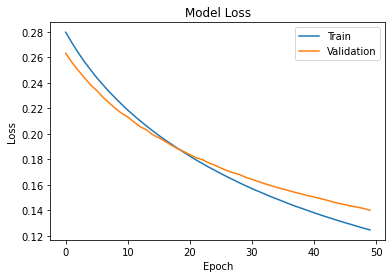

In [23]:
plot_loss(history)


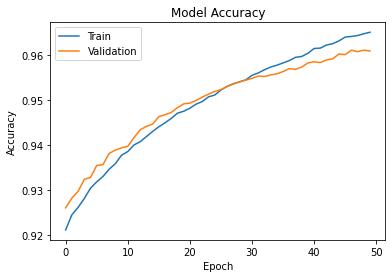

In [24]:
plot_acc(history)